## t-Distributed Stochastic Neighbor Embedding

In [2]:
import glob
import sys
import os
import copy
import math
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [3]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [4]:
# INPUT = os.getcwd()
INPUT = '/run/media/superuser/Almacen/mapbiomas/dadosCol10/ROIsv2'
INPUT

'/run/media/superuser/Almacen/mapbiomas/dadosCol10/ROIsv2'

In [7]:
year = 2000
bacia = '7591'

In [6]:
allfiles = glob.glob(os.path.join(INPUT, "*.csv"))
allfiles 

['/run/media/superuser/Almacen/mapbiomas/dadosCol10/ROIsv2/rois_grade_7591.csv',
 '/run/media/superuser/Almacen/mapbiomas/dadosCol10/ROIsv2/7615.csv',
 '/run/media/superuser/Almacen/mapbiomas/dadosCol10/ROIsv2/rois_grade_752.csv',
 '/run/media/superuser/Almacen/mapbiomas/dadosCol10/ROIsv2/7746.csv',
 '/run/media/superuser/Almacen/mapbiomas/dadosCol10/ROIsv2/rois_grade_7584.csv',
 '/run/media/superuser/Almacen/mapbiomas/dadosCol10/ROIsv2/773.csv',
 '/run/media/superuser/Almacen/mapbiomas/dadosCol10/ROIsv2/765.csv',
 '/run/media/superuser/Almacen/mapbiomas/dadosCol10/ROIsv2/rois_grade_7438.csv',
 '/run/media/superuser/Almacen/mapbiomas/dadosCol10/ROIsv2/rois_grade_746.csv',
 '/run/media/superuser/Almacen/mapbiomas/dadosCol10/ROIsv2/7712.csv',
 '/run/media/superuser/Almacen/mapbiomas/dadosCol10/ROIsv2/rois_grade_761111.csv',
 '/run/media/superuser/Almacen/mapbiomas/dadosCol10/ROIsv2/7619.csv']

In [9]:
df_from_each_file = []
zz = 0
for cc, file in enumerate(allfiles):    
    ls_parte = file.split('/')
    name_bacia = ls_parte[-1].replace('.csv', '')     
    if bacia in name_bacia :
        print('lindo de {} ==> {}'.format(cc ,file))
        newdf = pd.read_csv(file)     
        print(newdf.head())

newdf = newdf.drop(['system:index','.geo'], axis=1)     
        

lindo de 0 ==> /run/media/superuser/Almacen/mapbiomas/dadosCol10/ROIsv2/rois_grade_7591.csv
           system:index  GRID_ID  afvi_median  afvi_median_dry  \
0  00000000000000000000     6327     0.474144          0.40765   
1  00000000000000000001     6327     0.474144          0.40765   
2  00000000000000000002     6327     0.474144          0.40765   
3  00000000000000000003     6327     0.474144          0.40765   
4  00000000000000000004     6327     0.474144          0.40765   

   afvi_median_wet  avi_median  avi_median_dry  avi_median_wet  awei_median  \
0         0.542501    0.008051        0.006317        0.010209     -1.15021   
1         0.542501    0.008051        0.006317        0.010209     -1.15021   
2         0.542501    0.008051        0.006317        0.010209     -1.15021   
3         0.542501    0.008051        0.006317        0.010209     -1.15021   
4         0.542501    0.008051        0.006317        0.010209     -1.15021   

   awei_median_dry  ...  swir2_media

In [10]:
newdf.head()

,GRID_ID,afvi_median,afvi_median_dry,afvi_median_wet,avi_median,avi_median_dry,avi_median_wet,awei_median,awei_median_dry,awei_median_wet,...,swir2_median_dry,swir2_median_wet,swir2_stdDev,ui_median,ui_median_dry,ui_median_wet,wetness_median,wetness_median_dry,wetness_median_wet,year
0,6327,0.474144,0.40765,0.542501,0.008051,0.006317,0.010209,-1.15021,-1.193622,-1.004006,...,0.172212,0.146844,0.031647,-0.167243,-0.086003,-0.255342,0.415675,0.403225,0.397145,1989
1,6327,0.474144,0.40765,0.542501,0.008051,0.006317,0.010209,-1.15021,-1.193622,-1.004006,...,0.172212,0.146844,0.031647,-0.167243,-0.086003,-0.255342,0.415675,0.403225,0.397145,1989
2,6327,0.474144,0.40765,0.542501,0.008051,0.006317,0.010209,-1.15021,-1.193622,-1.004006,...,0.172212,0.146844,0.031647,-0.167243,-0.086003,-0.255342,0.415675,0.403225,0.397145,1989
3,6327,0.474144,0.40765,0.542501,0.008051,0.006317,0.010209,-1.15021,-1.193622,-1.004006,...,0.172212,0.146844,0.031647,-0.167243,-0.086003,-0.255342,0.415675,0.403225,0.397145,1989
4,6327,0.474144,0.40765,0.542501,0.008051,0.006317,0.010209,-1.15021,-1.193622,-1.004006,...,0.172212,0.146844,0.031647,-0.167243,-0.086003,-0.255342,0.415675,0.403225,0.397145,1989


In [29]:
text = ''
for cc, col in enumerate(newdf.columns):
    if (cc + 1) % 5 == 0:
        print(text)
        text = ""        
    else:
        text += '"' + str(col) + '",'
print(text)

"GRID_ID","afvi_median","afvi_median_dry","afvi_median_wet",
"avi_median_dry","avi_median_wet","awei_median","awei_median_dry",
"blue_median","blue_median_dry","blue_median_wet","blue_stdDev",
"brba_median_dry","brba_median_wet","brightness_median","brightness_median_dry",
"bsi_median","bsi_median_1","bsi_median_2","class",
"cvi_median_dry","cvi_median_wet","dswi5_median","dswi5_median_dry",
"evi_median","evi_median_dry","evi_median_wet","gcvi_median",
"gcvi_median_wet","gemi_median","gemi_median_dry","gemi_median_wet",
"gli_median_dry","gli_median_wet","green_median","green_median_dry",
"green_stdDev","gvmi_median","gvmi_median_dry","gvmi_median_wet",
"iia_median","iia_median_dry","iia_median_wet","lswi_median",
"lswi_median_wet","mbi_median","mbi_median_dry","mbi_median_wet",
"nddi_median_dry","nddi_median_wet","ndvi_median","ndvi_median_dry",
"ndwi_median","ndwi_median_dry","ndwi_median_wet","nir_median",
"nir_median_dry","nir_median_dry_contrast","nir_median_wet","nir_stdDev",
"osa

In [13]:
newdf['class'].unique()

array([15,  4,  3, 21, 12, 18, 22])

In [14]:
dictLabel = {
    '3': 'Forest formation',
    '4': 'Savanna Formation',
    '12': 'Grassland',
    '15': 'Pasture',
    '18': 'Agriculture',
    '21': 'Mosaic of use',
    '22': 'Non vegetated Area',
    '33': 'Water'
}

In [15]:
columns_features = [
            "afvi_median","afvi_median_dry","afvi_median_wet",
            "avi_median_dry","avi_median_wet","awei_median","awei_median_dry",
            "blue_median","blue_median_dry","blue_median_wet","blue_stdDev",
            "brba_median_dry","brba_median_wet","brightness_median",
            "bsi_median","bsi_median_1","bsi_median_2","brightness_median_dry",
            "cvi_median_dry","cvi_median_wet","dswi5_median","dswi5_median_dry",
            "evi_median","evi_median_dry","evi_median_wet","gcvi_median",
            "gcvi_median_wet","gemi_median","gemi_median_dry","gemi_median_wet",
            "gli_median_dry","gli_median_wet","green_median","green_median_dry",
            "green_stdDev","gvmi_median","gvmi_median_dry","gvmi_median_wet",
            "iia_median","iia_median_dry","iia_median_wet","lswi_median",
            "lswi_median_wet","mbi_median","mbi_median_dry","mbi_median_wet",
            "nddi_median_dry","nddi_median_wet","ndvi_median","ndvi_median_dry",
            "ndwi_median","ndwi_median_dry","ndwi_median_wet","nir_median",
            "nir_median_dry","nir_median_dry_contrast","nir_median_wet","nir_stdDev",
            "osavi_median_dry","osavi_median_wet","ratio_median","ratio_median_dry",
            "red_median","red_median_contrast","red_median_dry","red_median_dry_contrast",
            "red_stdDev","ri_median","ri_median_dry","ri_median_wet",
            "rvi_median_1","rvi_median_wet","shape_median","shape_median_dry",
            "solpe","swir1_median","swir1_median_dry","swir1_median_wet",
            "swir2_median","swir2_median_dry","swir2_median_wet","swir2_stdDev",
            "ui_median_dry","ui_median_wet","wetness_median","wetness_median_dry",         
        ]
classe = "class"

In [16]:
len(columns_features)

86

In [17]:
featureTest = ['blue', 'blue_1','blue_median', 'blue_median_dry', 'blue_stdDev']
featureTest2 = ['iia', 'iia_median', 'iia_median_dry']

In [18]:
feature_imp = [
    'blue_median', 'blue_median_dry', 'blue_stdDev', 'red_stdDev', 
    'red_median','nir_median', 'nir_stdDev', 'swir1_median', 'swir1_stdDev', 
    'swir2_stdDev', 'ndwi', 'iia', 'ndvi', 'cvi', 'cvi_median', 
    'cvi_median_dry', 'rvi', 'rvi_median', 'rvi_median_dry', 
    'gcvi', 'ratio_median', 'npv', 'npv_median', 'npv_median_dry', 
    'ndfia', 'ndfia_median', 'ndfia_median_dry', 'soil', 'soil_median', 
    'soil_median_dry', 'gv', 'gv_median', 'gv_median_dry'
]
bloco1 = ['gv_median','npv_median','soil_median','npv_amp','swir1_median']

In [20]:
conta = newdf[['class', 'blue_median']].groupby('class').count()
conta

,blue_median
class,
3,100959
4,529689
12,73299
15,301494
18,1383
21,26738
22,4149


In [21]:
valquant = conta['blue_median'].values
valquant

array([100959, 529689,  73299, 301494,   1383,  26738,   4149])

In [ ]:
# colocar gráficos por classes para a serie historica em indices de Vegetação 

TypeError: object of type 'list_reverseiterator' has no len()

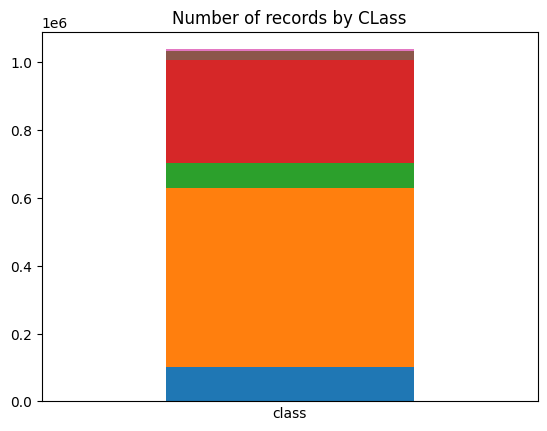

In [24]:
newdf.assign(dummy = 1).groupby(
  ['dummy','class']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)
plt.title('Number of records by CLass')
# other it'll show up as 'dummy' 
plt.xlabel('class')
# disable ticks in the x axis
plt.xticks([])
# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels =[str(kk) + ' <=> '+ str(valquant[cc]) for cc,  kk in enumerate(newdf['class'].unique())]
labels.sort(reverse=True)
plt.legend(reversed_handles,labels,loc='lower left',bbox_to_anchor=(1.1, 0.05), ncol=2)
plt.show()


In [25]:
# Create an array with the colors you want to use
colors = ["#006400","#00ff00","#B8AF4F","#FFD966","#E974ED","#EA9999","#665a3a"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

dict_class = {
    '3': 'Forest formation',
    '4': 'Savanna Formation',
    '12': 'Grassland',
    '15': 'Pasture',
    '18': 'Agriculture',
    '21': 'Mosaic of use',
    '22': 'Non vegetated Area',
    '33': 'Water'
}
markersplot = ["o","s","^","p","X","*","d"]  # ,"<"


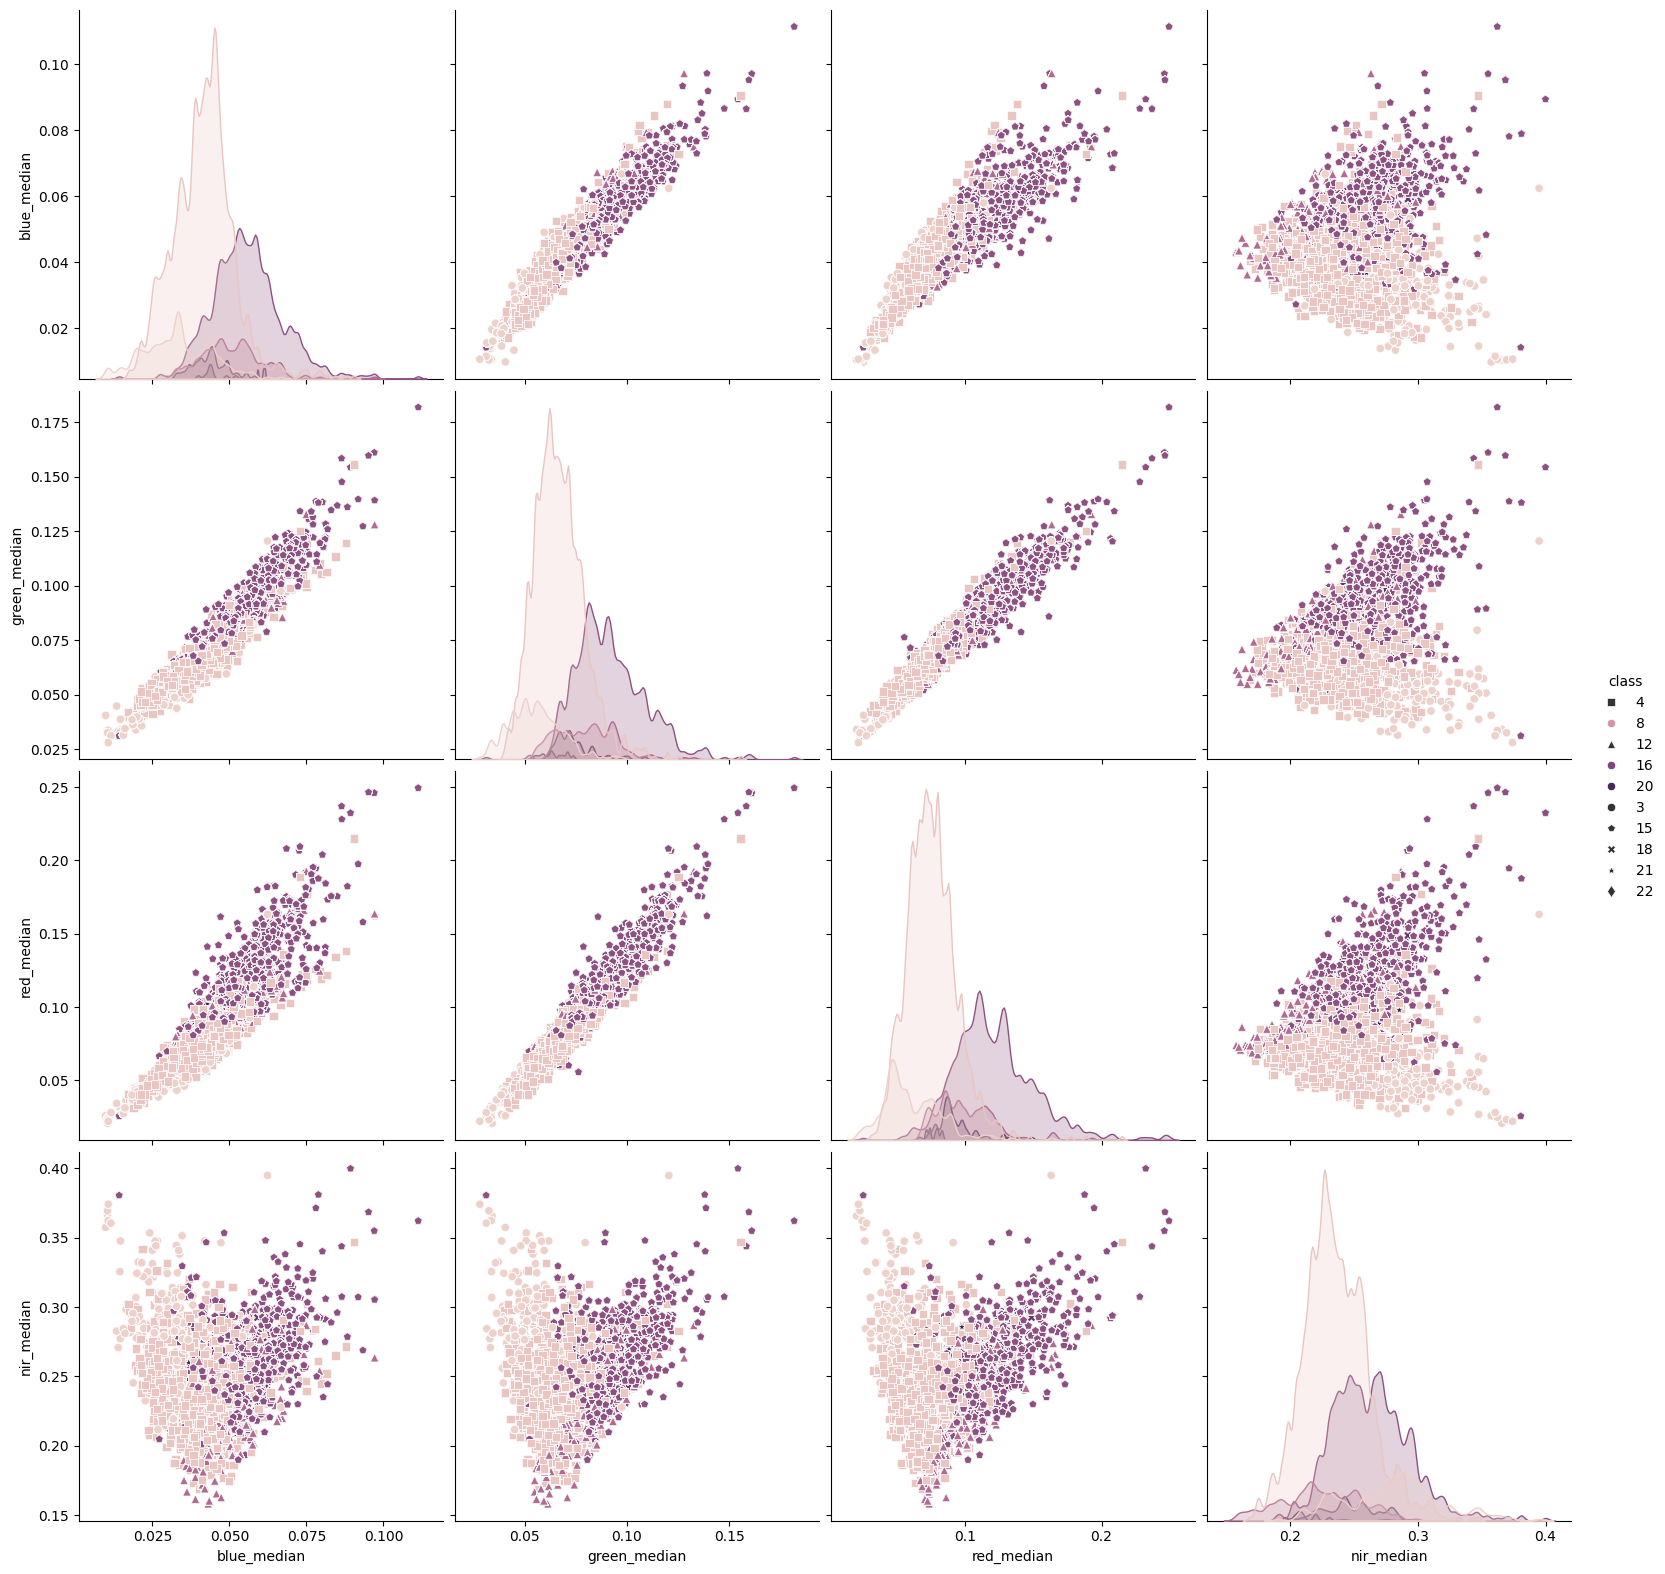

In [27]:
bloco1 = ['blue_median','green_median','red_median','nir_median']


sns.pairplot(vars=bloco1, data= newdf, hue='class', height=4, markers= markersplot)
sns.set_context("notebook", font_scale=1.5)  # 

In [ ]:
bloco1 = ['ndvi_median','ndwi_median','slope_1','gcvi_median']
sns.pairplot(vars=bloco1, data= concat_df, hue='class', height=4, markers= markersplot)
sns.set_context("notebook", font_scale=1.5)  # 

In [ ]:
bloco1 = ['gv_median','npv_median','soil_median','npv_amp']
sns.pairplot(vars=bloco1, data= concat_df, hue='class', height=4, markers= markersplot)
sns.set_context("notebook", font_scale=1.5)  # 

In [ ]:
from random import randint
colunas_index = [ 
                    'blue_median','green_median','red_median','nir_median', 
                    'ndvi_median','ndwi_median','slope_1','gcvi_median',
                    'gv_median','npv_median','soil_median','npv_amp'
                ]

In [ ]:
def ploting_violin_rois_Class_index (featA):

    fig , axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18, 9))
    # Set your custom color palette
    sns.set_palette(sns.color_palette(colors))
    ladoA = sns.boxplot(x="class", y=featA, data=concat_df, ax= axes[0])  # , palette="Set3"
    ladoB = sns.violinplot(x="class", y=featA, data=concat_df,ax= axes[1], split=True, linestyle=':',  #  palette="Set3",
                        scale="count", inner="quartile")
    # sns.catplot(x="label", y="shade", data=ndf, palette="Set3")  # ax= axes[2],
    ladoA.set_xlabel("CLASS",fontsize=16)
    ladoA.set_ylabel(featA,fontsize=16)
    ladoB.set_xlabel("CLASS",fontsize=16)
    ladoB.set_ylabel(featA,fontsize=16)
    ladoA.set_xticklabels(dict_class.values(), rotation=45) 
    ladoB.set_xticklabels(dict_class.values(), rotation=45)

    plt.suptitle('Plot ROIs class in {}'.format(featA), fontsize=24)
    plt.show()

In [ ]:
for ii in range(10):
    numsort = randint(0, len(colunas_index) - 1)
    ploting_violin_rois_Class_index(colunas_index[numsort]) 

In [ ]:
X = concat_df[columns_features]
y = concat_df['class']

In [ ]:
X.shape

In [ ]:
porcentagemFeat = int(X.shape[1] * 0.3)
porcentagemFeat 

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
# feature extraction
test = SelectKBest(score_func=f_classif, k=porcentagemFeat)

In [ ]:
fit_KBest = test.fit(X, y)

In [ ]:
# summarize scores
set_printoptions(precision= porcentagemFeat)
print(fit_KBest.scores_)
print(len(fit_KBest.scores_))

In [ ]:
list_ordenda = copy.deepcopy(fit_KBest.scores_)
list_ordenda =sorted(list_ordenda)
print(list_ordenda)
corte = int(len(list_ordenda) * 0.23)
print(corte)
valor_corte = list_ordenda[corte]
print("corte do core para importancia ", valor_corte)

In [ ]:
def print_blocos_5Feat(lst_features):
    text = ''
    for cc, col in enumerate(lst_features):
        if (cc + 1) % 5 == 0:
            print(text)
            text = ""

        else:
            text += '"' + str(col) + '",'

In [ ]:
list_feat_kbest = []
for cc, vv in enumerate(fit_KBest.scores_):
    if vv < valor_corte:
        list_feat_kbest.append(columns_features[cc])
        
print("lista de todas as features importantes pelo KBest \n")
print_blocos_5Feat(list_feat_kbest)
print("\n com {} features".format(len(list_feat_kbest))) 

In [ ]:
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, n_features_to_select=porcentagemFeat, step=1)   # , porcentagemFeat
fit_RFE = rfe.fit(X, y)

/home/superuser/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/superuser/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/home/superuser/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/superuser/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/home/superuser/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/superuser/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/home/superuser/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/superuser/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [ ]:
fit_RFE.support_

In [ ]:
print(fit_RFE.ranking_)
print(len(fit_RFE.ranking_))

In [ ]:
# list Feature importance
ls_Feat_importRFE = []
for cc, feat in enumerate(columns_features):
    if fit_RFE.support_[cc]:
        ls_Feat_importRFE.append(feat)


print("lista de todas as features importantes pelo REF \n")
print_blocos_5Feat(ls_Feat_importRFE)
print("\n com {} features".format(len(list_feat_kbest))) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classf_RF = RandomForestClassifier(
                            n_estimators=135, 
                            max_features=25)
rfe = RFE(classf_RF, n_features_to_select=porcentagemFeat, step=1)
fit_rfe = rfe.fit(X, y)

In [ ]:
print("Selected Features: %s" % fit_rfe.support_)

In [ ]:
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

In [ ]:
# list Feature importance
ls_Feat_import = []
for cc, feat in enumerate(columns_features):
    if fit.support_[cc]:
        ls_Feat_import.append(feat)

print(ls_Feat_import)


In [ ]:
novas_features = np.unique(list_feat_kbest + ls_Feat_import)
novas_features

In [ ]:
lista_Feat_final = [kk for kk in novas_features]
print("numero de Features ", len(lista_Feat_final))
print(lista_Feat_final)

In [ ]:
clf = RandomForestClassifier(n_estimators=225, max_depth=25, min_samples_split=20, random_state=0)
clf.fit(X_train[columnaTraining], y_train)
y_pred = clf.predict(X_test[columnaTraining])

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
matrix

In [ ]:
plot_confusion_matrix(clf, X_test[columnaTraining], y_test) 
plt.show()  